In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plotting a time series
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label='Time series example')
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return slope * (-np.sqrt(time))

def seasonal_pattern(season_time):
    return np.where(season_time < 0.5,
                    np.sin(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [4]:
# Base series parameters
time = np.arange(4 * 365 + 1)
baseline = 10

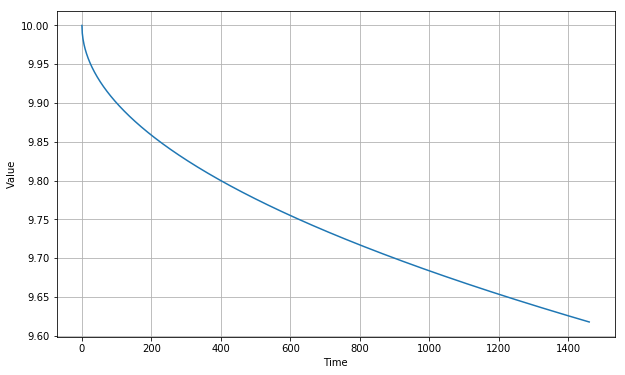

In [5]:
# Trend example
series = baseline + trend(time, 0.01)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

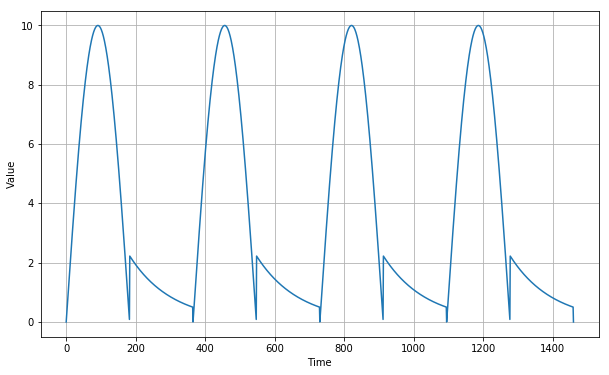

In [6]:
# Seasonality example
series = seasonality(time, period=365, amplitude=10)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

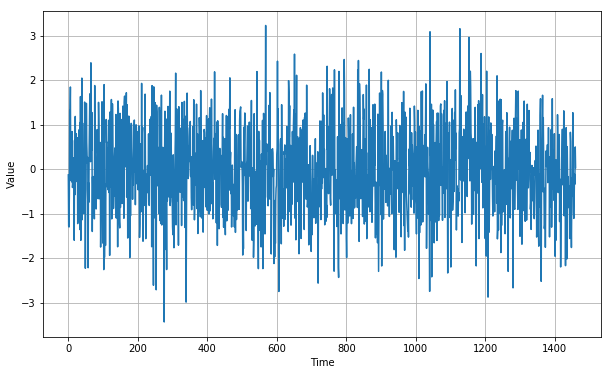

In [7]:
# Noise example
series = white_noise(time, noise_level=1, seed=None)
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

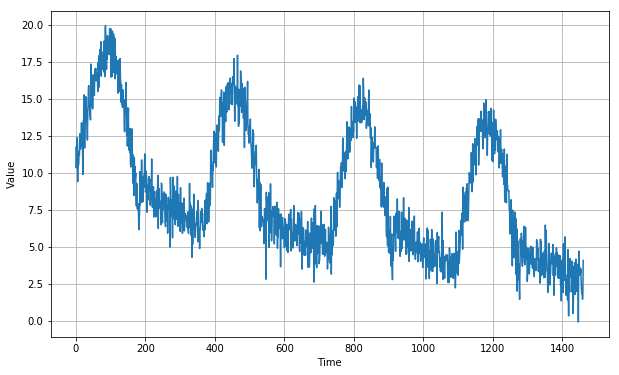

In [14]:
# Combining all three features
series = baseline + trend(time,0.2) + white_noise(time, noise_level=1, seed=0) + seasonality(time, period=365, amplitude=10, phase=0)
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()